# Resource Human Dataset

In [ ]:
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install graphviz

In [1]:
import seaborn as sns
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
matplotlib.style.use('ggplot')
import plotly
import colorsys
plt.style.use('seaborn-talk')
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division
import pylab
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import colors as mcolors
from scipy import stats
from sklearn.tree import export_graphviz
from sklearn import metrics
import types
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
from sklearn.utils.multiclass import unique_labels
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pydotplus    
from IPython.display import Image  
from IPython.display import display, HTML
%matplotlib inline

## Importando as bases

In [2]:
df = pd.read_csv("dataset/HR_Engagement_Sat_Sales_UpdatedV4.0.csv")
df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


## Análise Exploratória

In [3]:
df.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,...,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,...,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,...,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,...,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4893.000000,85.000000,8.000000
max,14999.000000,1.0,1.000000,1.0,3.0,6.0,6.0,1.000000,3.0,3.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8500.000000,90.000000,10.000000


In [4]:
df_isnull = (df.isnull().sum() / len(df))*100
df_isnull = df_isnull.drop(df_isnull[df_isnull ==0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Percentual Missing' :df_isnull})
missing_data

,Percentual Missing
Rising_Star,99.859991
Critical,96.799787
CSR Factor,88.579239
Men_Leave,67.564504
Women_Leave,49.356624
EMP_Sat_OnPrem_5,0.853390
EMP_Sat_OnPrem_4,0.853390
EMP_Sat_OnPrem_3,0.853390
EMP_Sat_OnPrem_2,0.853390
EMP_Sat_OnPrem_1,0.853390


## Ajuste de features

In [5]:
df[['Rising_Star', 'Critical']] = df[['Rising_Star', 'Critical']].fillna(value=0)

In [6]:
df['Leave'] = df[['Women_Leave', 'Men_Leave']].apply(lambda l: l['Men_Leave']
                                                     if np.isnan(l['Women_Leave'])
                                                     else l['Women_Leave'], axis=1)

In [7]:
df.drop(['CSR Factor', 'Women_Leave', 'Men_Leave'], axis=1, inplace=True)

In [8]:
df.dropna(inplace=True)

### Quantidade de observações

In [9]:
df.shape

(12353, 60)

## Análise da Distribuição dos Cargos dos funcionários

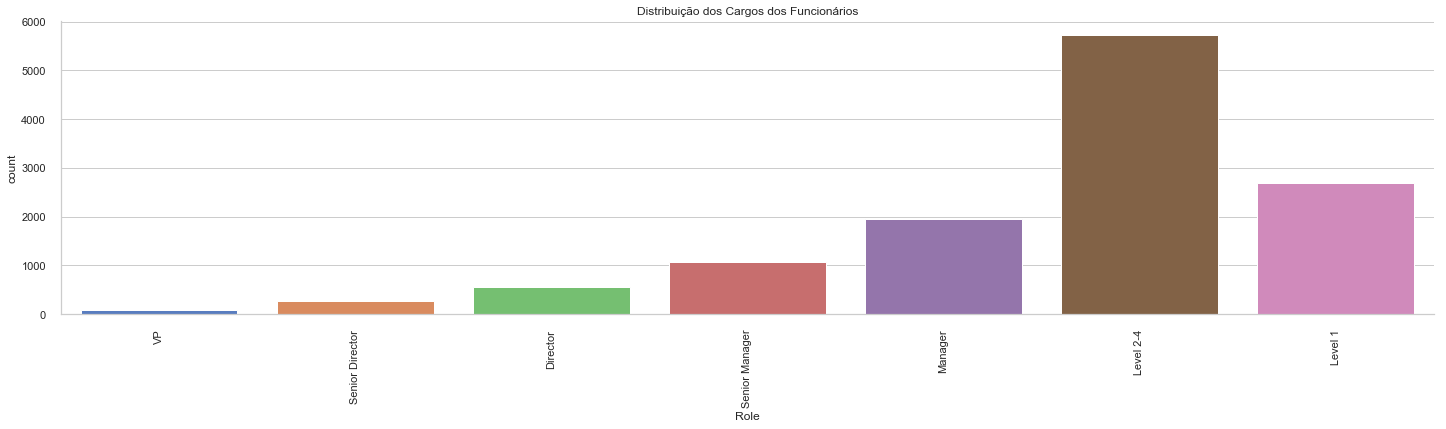

In [11]:
g = sns.catplot("Role", data=df, aspect=4, kind="count")
g.set_xticklabels(rotation=90)
g = plt.title("Distribuição dos Cargos dos Funcionários")

## Insatisfação dos funcionários em relação à cada cargo

## Contagem de Funcionários por País

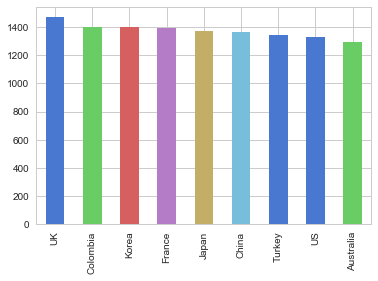

In [31]:
df.GEO.value_counts().plot.bar()

## Análise de Correlação entre as Features e Target

In [24]:
def plotar_correlacao(df):
    corr = df.corr(method='spearman')
    fig = plt.figure(11)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(df.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()

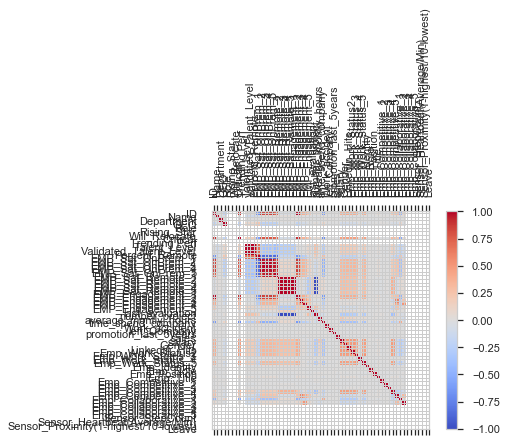

In [25]:
plotar_correlacao(df)

### Correlação entre um grupo de features

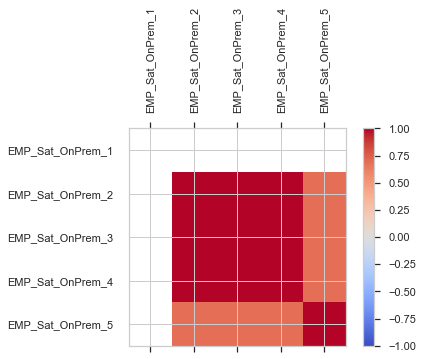

In [39]:
dfcorr = df[["EMP_Sat_OnPrem_"+str(col) for col in range(1,6)]]
plotar_correlacao(dfcorr)

### Reduzir a dimensionalidade do problema

In [15]:
cols_reduzir = {'onpremise': ["EMP_Sat_OnPrem_"+str(col) for col in range(1,6)],
            'remote': ["EMP_Sat_Remote_"+str(col) for col in range(1,6)],
            'engagement': ["EMP_Engagement_"+str(col) for col in range(1,6)]
            }
pcas = {}
for col in cols_reduzir:
    pca = PCA(n_components=1)
    pcas[col] = pca
    pca.fit(df[ cols_reduzir[col] ].values)
    print(col +": "+ str(pca.explained_variance_ratio_))
    df[col] = pca.transform(df[ cols_reduzir[col]].values)
    df.drop(cols_reduzir[col], axis=1, inplace=True)
    
df.shape

onpremise: [0.97080449]
remote: [0.93175926]
engagement: [1.]


(12353, 48)

## Quantidade de homens e mulheres

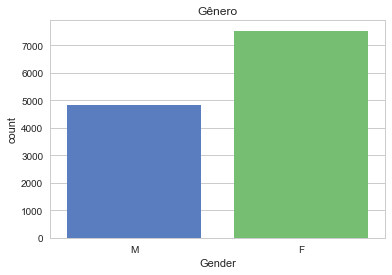

In [35]:
sns.countplot(df["Gender"])
g = plt.title("Gênero")

Text(0.5,1,'Acidente de Trabalho')

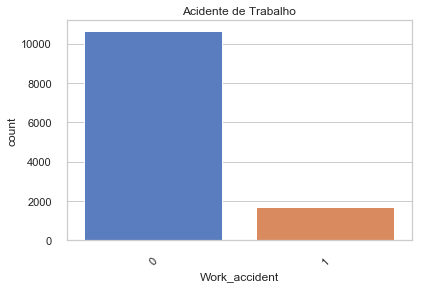

In [13]:
plt.figure()#figsize=(16,5))
sns.countplot('Work_accident', data = df)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title("Acidente de Trabalho")

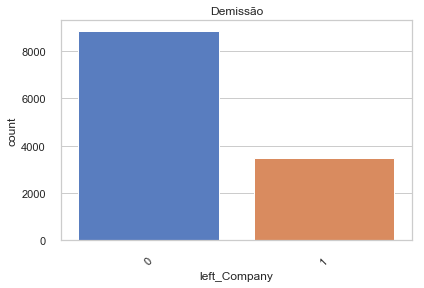

In [14]:
plt.figure()#figsize=(16,5))
sns.countplot('left_Company', data = df)
plt.xticks(rotation = 45)
plt.tight_layout()
g = plt.title("Demissão")

## Criação do Modelo

### Definir Feature e Target

In [18]:
y = df[['Leave']]
#y['Leave'] = np.random.permutation(y.Leave)
X = df.drop('Leave', axis=1)

### Remover features

In [19]:
X.drop(['ID', 'Name'],axis=1,inplace=True)

### Tipos das features

In [20]:
X.dtypes

Department                                object
GEO                                       object
Role                                      object
Rising_Star                              float64
Will_Relocate                              int64
Critical                                 float64
Trending Perf                              int64
Talent_Level                               int64
Validated_Talent_Level                     int64
Percent_Remote                           float64
EMP_Sat_OnPrem_1                         float64
EMP_Sat_OnPrem_2                         float64
EMP_Sat_OnPrem_3                         float64
EMP_Sat_OnPrem_4                         float64
EMP_Sat_OnPrem_5                         float64
EMP_Sat_Remote_1                           int64
EMP_Sat_Remote_2                           int64
EMP_Sat_Remote_3                           int64
EMP_Sat_Remote_4                           int64
EMP_Sat_Remote_5                           int64
EMP_Engagement_1    

### Converter de Dados Categóricos para Dados Numéricos

In [21]:
for col in X.dtypes.index:
    if(X.dtypes[col] == np.dtype):
        dummies = pd.get_dummies(X[col])
        for d in dummies.keys():
            X[col+"_"+d] = dummies[d]
        X.drop(col, axis=1, inplace=True)

X.dtypes

Rising_Star               float64
Will_Relocate               int64
Critical                  float64
Trending Perf               int64
Talent_Level                int64
Validated_Talent_Level      int64
Percent_Remote            float64
EMP_Sat_OnPrem_1          float64
EMP_Sat_OnPrem_2          float64
EMP_Sat_OnPrem_3          float64
EMP_Sat_OnPrem_4          float64
EMP_Sat_OnPrem_5          float64
EMP_Sat_Remote_1            int64
EMP_Sat_Remote_2            int64
EMP_Sat_Remote_3            int64
EMP_Sat_Remote_4            int64
EMP_Sat_Remote_5            int64
EMP_Engagement_1            int64
EMP_Engagement_2            int64
EMP_Engagement_3            int64
EMP_Engagement_4            int64
EMP_Engagement_5            int64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left_Company                int64
promotion_last_5years       int64
LinkedIn_Hits 

### Divisão da base em: Treino, Teste e Validação

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print("Quantidade Observações:\nTreino: {tr}\nTeste: {te}\nValidação: {v}".format(tr = X_train.shape[0],
                                                                                 te = X_test.shape[0],
                                                                                 v = X_val.shape[0]))

Quantidade Observações:
Treino: 7905
Teste: 2471
Validação: 1977


### Treinamento

In [53]:
#from dask.distributed import Client
#client = Client(n_workers=4, threads_per_worker=1)
#client

In [57]:
tp = TPOTClassifier(
    generations=2,
    population_size=10,
    cv=2,
    n_jobs=-1,
    random_state=0,
    verbosity=0,
    #use_dask=True
)

In [59]:
tp.fit(X_train, y_train.Leave.ravel())

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=2,
        disable_update_check=False, early_stop=None, generations=2,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=10,
        random_state=0, scoring=None, subsample=1.0, use_dask=False,
        verbosity=0, warm_start=False)

In [60]:
print("Score: "+str(tp.score(X_test, y_test.Leave.ravel())))

HTML('''<div style="display: flex; justify-content: row;">
    <img src="https://media.giphy.com/media/kxei1ibnxITFUvvtJU/giphy.gif">
</div>''')

Score: 1.0


### Exportando o pipeline gerado pelo TPOT

In [61]:
tp.export('pipeline.py')

with open('pipeline.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=0)

# Average CV score on the training set was:1.0
exported_pipeline = GaussianNB()

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



### Construindo o modelo gerado pelo TPOT

In [36]:
rf = RandomForestClassifier(bootstrap=True, 
                               criterion="entropy", 
                               max_features=0.15000000000000002, 
                               min_samples_leaf=1, 
                               min_samples_split=14, 
                               n_estimators=100)

In [37]:
rf.fit(X_train, y_train.Leave.ravel())
y_pred_valid = rf.predict(X_val)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

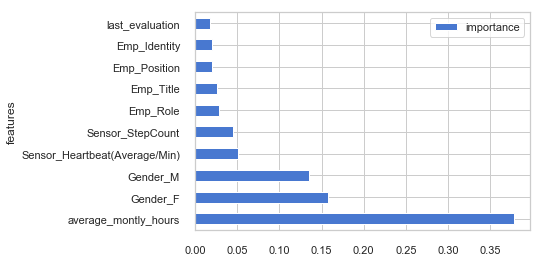

In [38]:
importance = pd.DataFrame({'features': list(X_train.columns), 'importance': list(rf.feature_importances_)})
importance.sort_values(by='importance', ascending=False).head(10).plot.barh(x='features')

## Correlação entre a carga horária de trabalho do funcionário e o Target por sexo

In [39]:
corr = (df[df['Gender']=='F'])[['average_montly_hours', 'Leave']].corr()
corr

,average_montly_hours,Leave
average_montly_hours,1.000000,0.765215
Leave,0.765215,1.000000


In [40]:
corr = (df[df['Gender']=='M'])[['average_montly_hours', 'Leave']].corr()
corr

,average_montly_hours,Leave
average_montly_hours,1.000000,-0.035247
Leave,-0.035247,1.000000


### Matriz de Confusão

In [44]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)

Confusion matrix, without normalization
[[ 426    0]
 [   0 1551]]
Confusion matrix, without normalization
[[ 569    0]
 [   0 1902]]


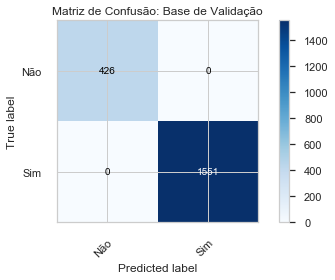

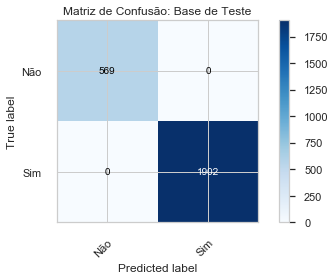

In [42]:

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_val.Leave, y_pred_valid, normalize=False, classes=['Não', 'Sim'],
                      title='Matriz de Confusão: Base de Validação')

plot_confusion_matrix(y_test.Leave, y_pred_test, normalize=False, classes=['Não', 'Sim'],
                      title='Matriz de Confusão: Base de Teste')

plt.show()

### Árvore de Decisão

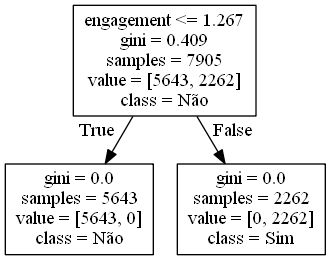

In [63]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf = 50, random_state=42)
tree.fit(X_train, y_train.Leave.ravel())
dot_data = export_graphviz(tree, out_file=None, 
                                feature_names=list(X_train.columns),  
                                class_names=['Não', 'Sim'])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Conclusão

### Perfil dos funcionários (as) que deixaram a empresa:

* Homens e mulheres que trabalham em média mais do que 160 horas mensais e que avaliaram com menos de 2.5 seu sentimento em relação ao cargo.

* Mulheres que trabalham em média mais do que 160 horas mensais e que avaliaram mais do que 2.5 seu sentimento em relação ao cargo.

* Homens que trabalham em média menos do que 160 horas mensais e que avaliaram seu sentimento em relação ao cargo com menos de 2.5.

### Logo:

Independentimente do sexo, se a pessoa não se sente bem em relação ao cargo e trabalha em média mais do que 160hs mensais ela deixará a empresa. Mulheres podem se sentir bem em relação ao cargo, mas exceder este tempo também faz com que elas deixem a empresa. 

Os homens mesmo trabalhando menos de 160 horas mensais se estiverem insatifeitos com seus cargos deixam a empresa.

# The end